In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.offline as pyo

# settig default size of figure :
plt.rcParams['figure.figsize'] = 17,8

import folium


import warnings
warnings.filterwarnings('ignore')

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_excel("Covid cases in India.xlsx")
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [5]:
df = df.drop(['S. No.'],axis=1)

In [6]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [7]:
total_cases_overall = df['Total Cases'].sum()
print('The total number of cases till April is ',total_cases_overall)

The total number of cases till April is  729


In [8]:
df['Active Cases'] = df['Total Cases'] - df['Cured'] - df['Death']
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [9]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [10]:
df['Name of State / UT'].value_counts()

Puducherry           1
Goa                  1
Haryana              1
West Bengal          1
Jammu and Kashmir    1
Punjab               1
Chhattisgarh         1
Rajasthan            1
Gujarat              1
Kerala               1
Bihar                1
Ladakh               1
Mizoram              1
Karnataka            1
Delhi                1
Chandigarh           1
Telengana            1
Himachal Pradesh     1
Uttar Pradesh        1
Madhya Pradesh       1
Manipur              1
Andhra Pradesh       1
Odisha               1
Tamil Nadu           1
Maharashtra          1
Uttarakhand          1
Name: Name of State / UT, dtype: int64

In [11]:
total_active_cases = df[['Active Cases','Name of State / UT']]
total_active_cases = total_active_cases.set_index('Name of State / UT')
total_active_cases = total_active_cases.sort_values(by='Active Cases',ascending=False)
total_active_cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Delhi,32
Uttar Pradesh,32
Punjab,28


## Graphical Representation :

### Pandas Vis :

<AxesSubplot:xlabel='Name of State / UT'>

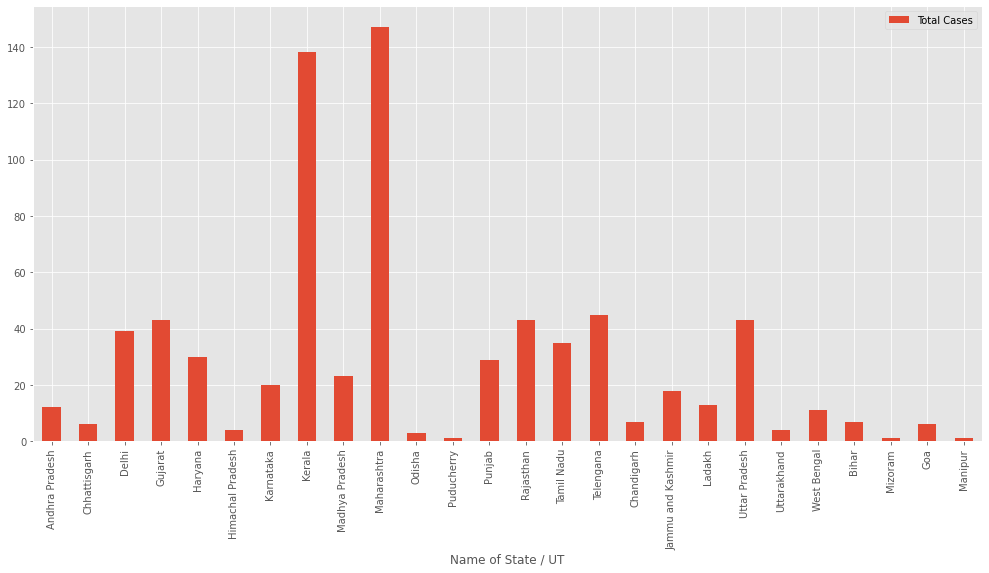

In [12]:
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')

### Matplotlib Vis :

''

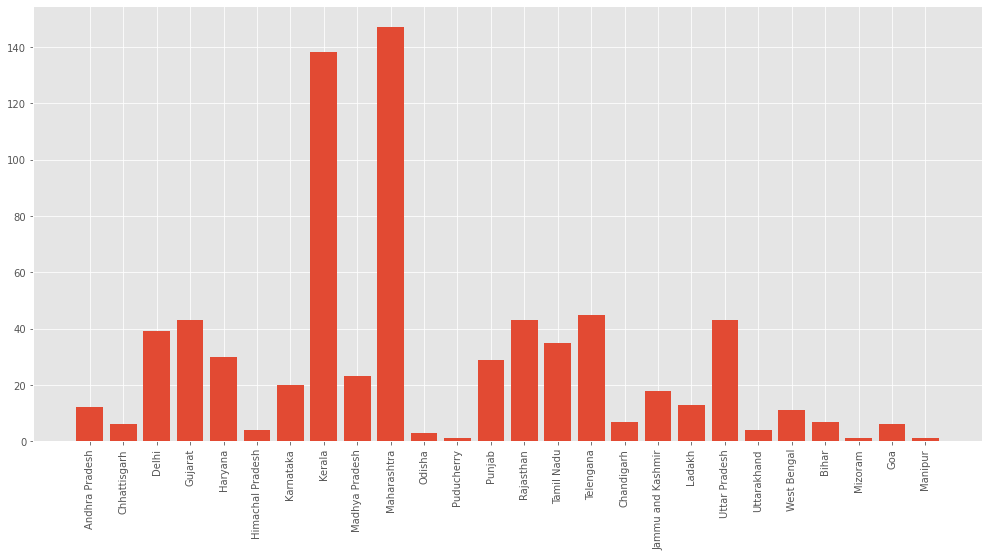

In [13]:
plt.bar(df['Name of State / UT'],df['Total Cases'])
plt.xticks(rotation='vertical')

;

### Plotly Vis :

In [14]:
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

### Plotly Express :

In [15]:
px.bar(df,x='Name of State / UT',y='Total Cases')

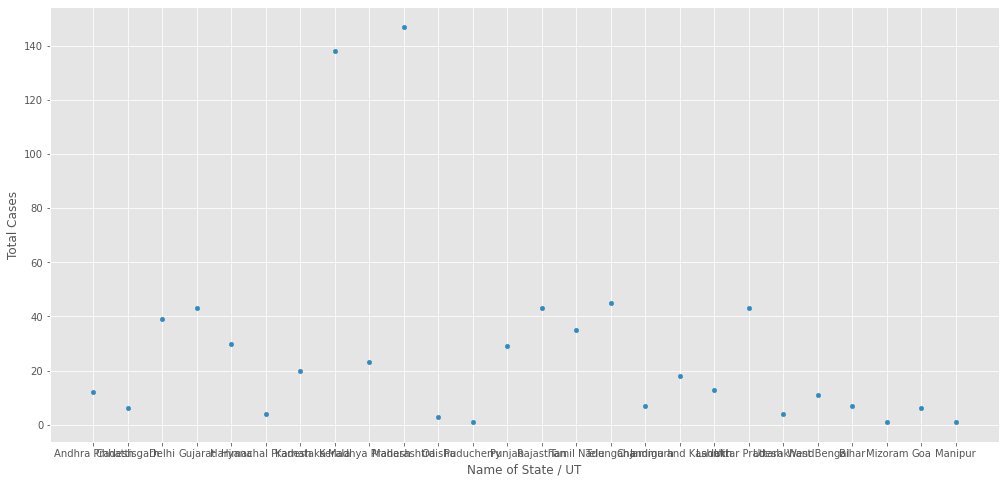

In [16]:
df.plot(kind='scatter',x='Name of State / UT',y='Total Cases');

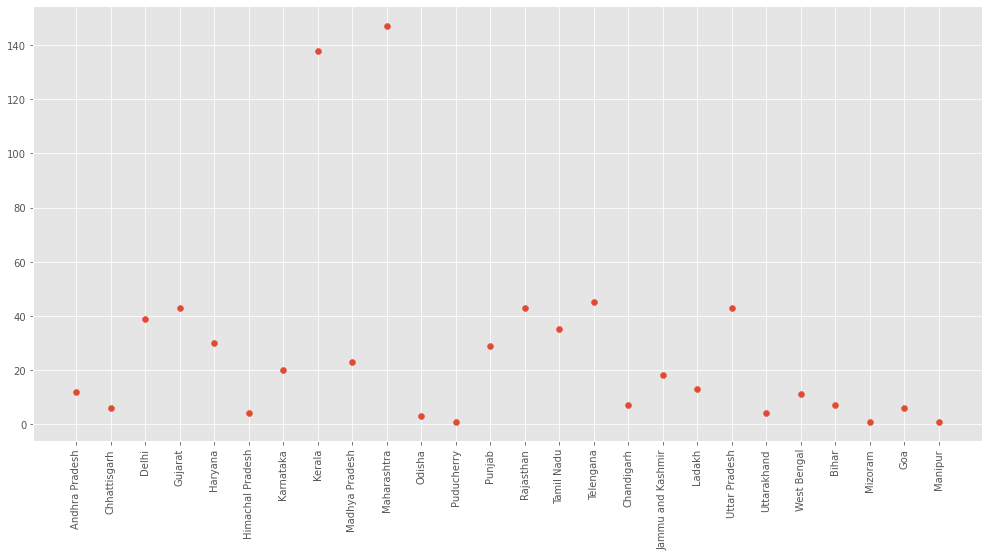

In [17]:
plt.scatter(df['Name of State / UT'],df['Total Cases'])
plt.xticks(rotation='vertical');

In [18]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='State Wise Total Covid cases',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=15);

In [19]:
px.scatter(df,x='Name of State / UT',y='Total Cases')

## OBJECT ORIENTED VISH :

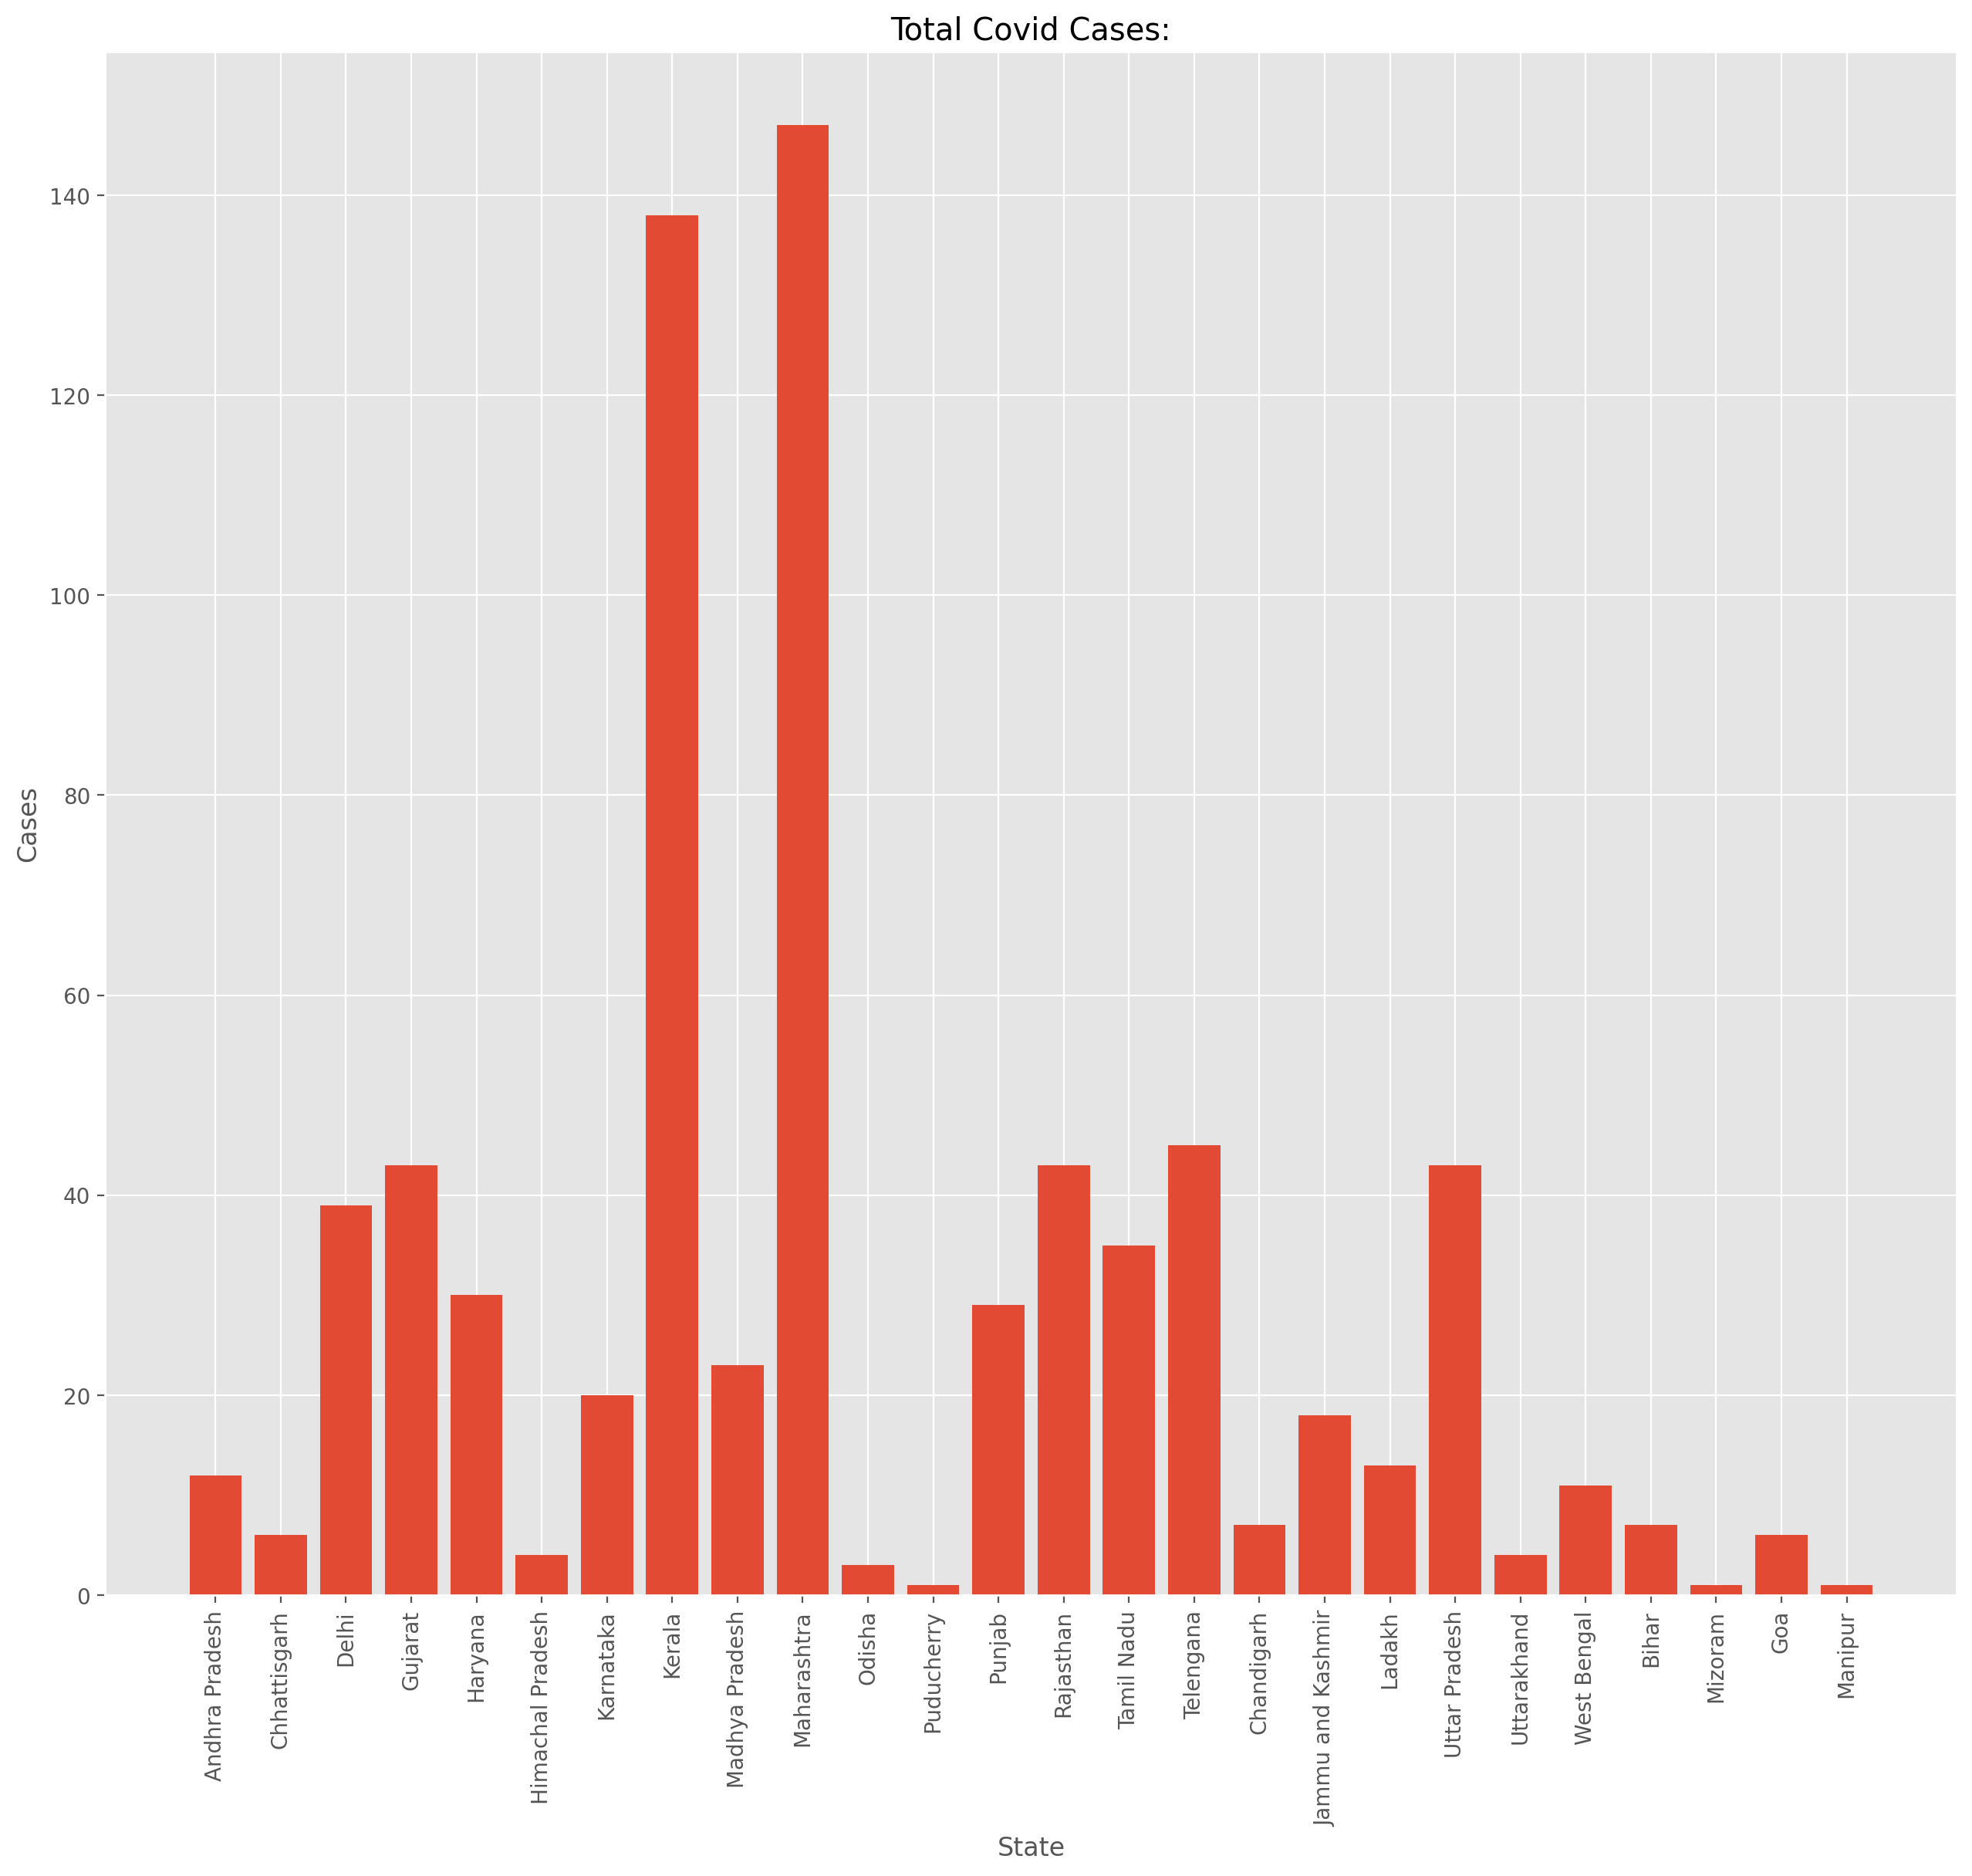

In [56]:
# Matplotlib :
fig = plt.figure(figsize=(12,10),dpi=200) # dpi is also related to size of fig
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title('Total Covid Cases:')
axes.set_xlabel('State')
axes.set_ylabel('Cases')
plt.xticks(rotation='vertical')
plt.show()

# plotly :
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']),)
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State'),yaxis=dict(title='Num of Cases'))

In [21]:
indian_cord = pd.read_excel('Indian Coordinates.xlsx')
indian_cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [22]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [23]:
df_full = pd.merge(indian_cord,df,on='Name of State / UT')
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [24]:
map = folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    
    folium.CircleMarker([lat,long],radius=value*0.5,popup=('<strong> State </strong>: '+str(name).capitalize() +
                                                           '<br>'
                                                           '<strong>Total Cases</strong>: ' + str(value) + 
                                                           '<br>' ) ,color='red',fill_color='red',fill_opacity=0.3).add_to(map)


In [25]:
map

# Global Rising Analysis :

In [26]:
df_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
df_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')
df_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
df_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')


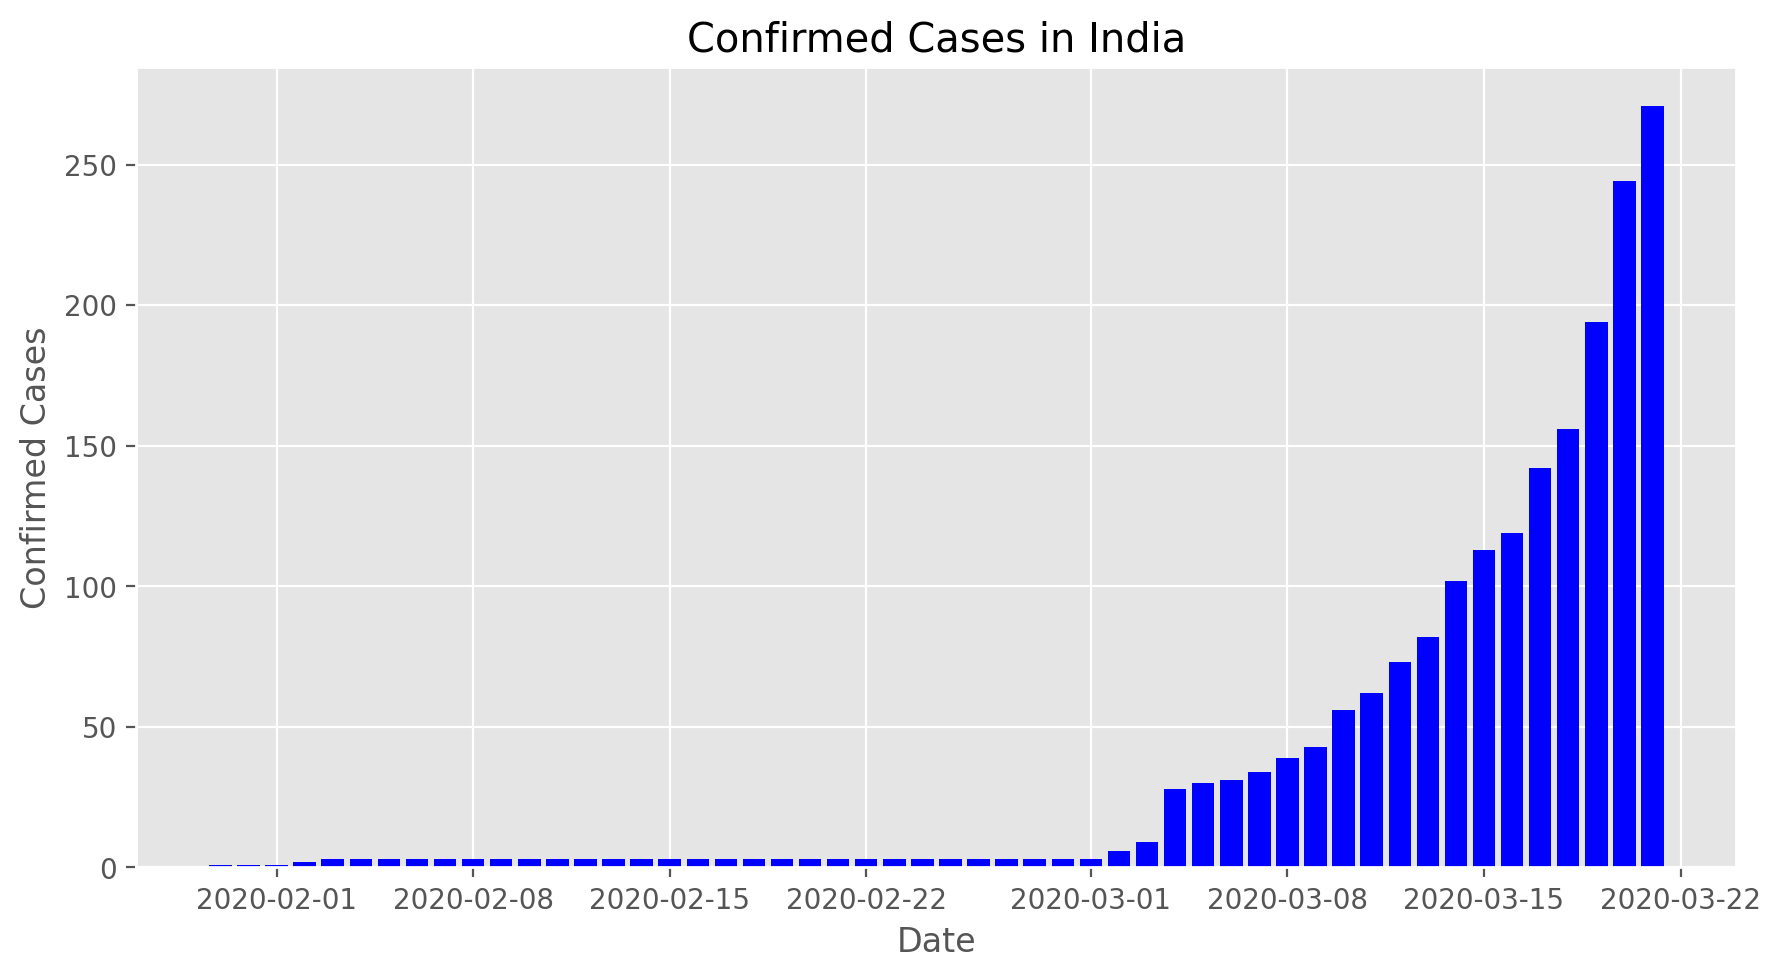

In [37]:
# matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df_India['Date'],df_India['Total Cases'],color='b')
axes.set_xlabel('Date')
axes.set_ylabel('Confirmed Cases')
axes.set_title('Confirmed Cases in India')
plt.show()

# plotly express :

fig = px.bar(df_India,df_India['Date'],df_India['Total Cases'],color='Total Cases',title='Confirmed Cases in India')
fig.show()

In [38]:
fig = px.bar(df_Italy,df_Italy['Date'],df_Italy['Total Cases'],color='Total Cases',title='Confirmed Cases in Italy')
fig.show()

fig = px.bar(df_Korea,df_Korea['Date'],df_Korea['Total Cases'],color='Total Cases',title='Confirmed Cases in Korea')
fig.show()

fig = px.bar(df_Wuhan,df_Wuhan['Date'],df_Wuhan['Total Cases'],color='Total Cases',title='Confirmed Cases in Wuhan')
fig.show()

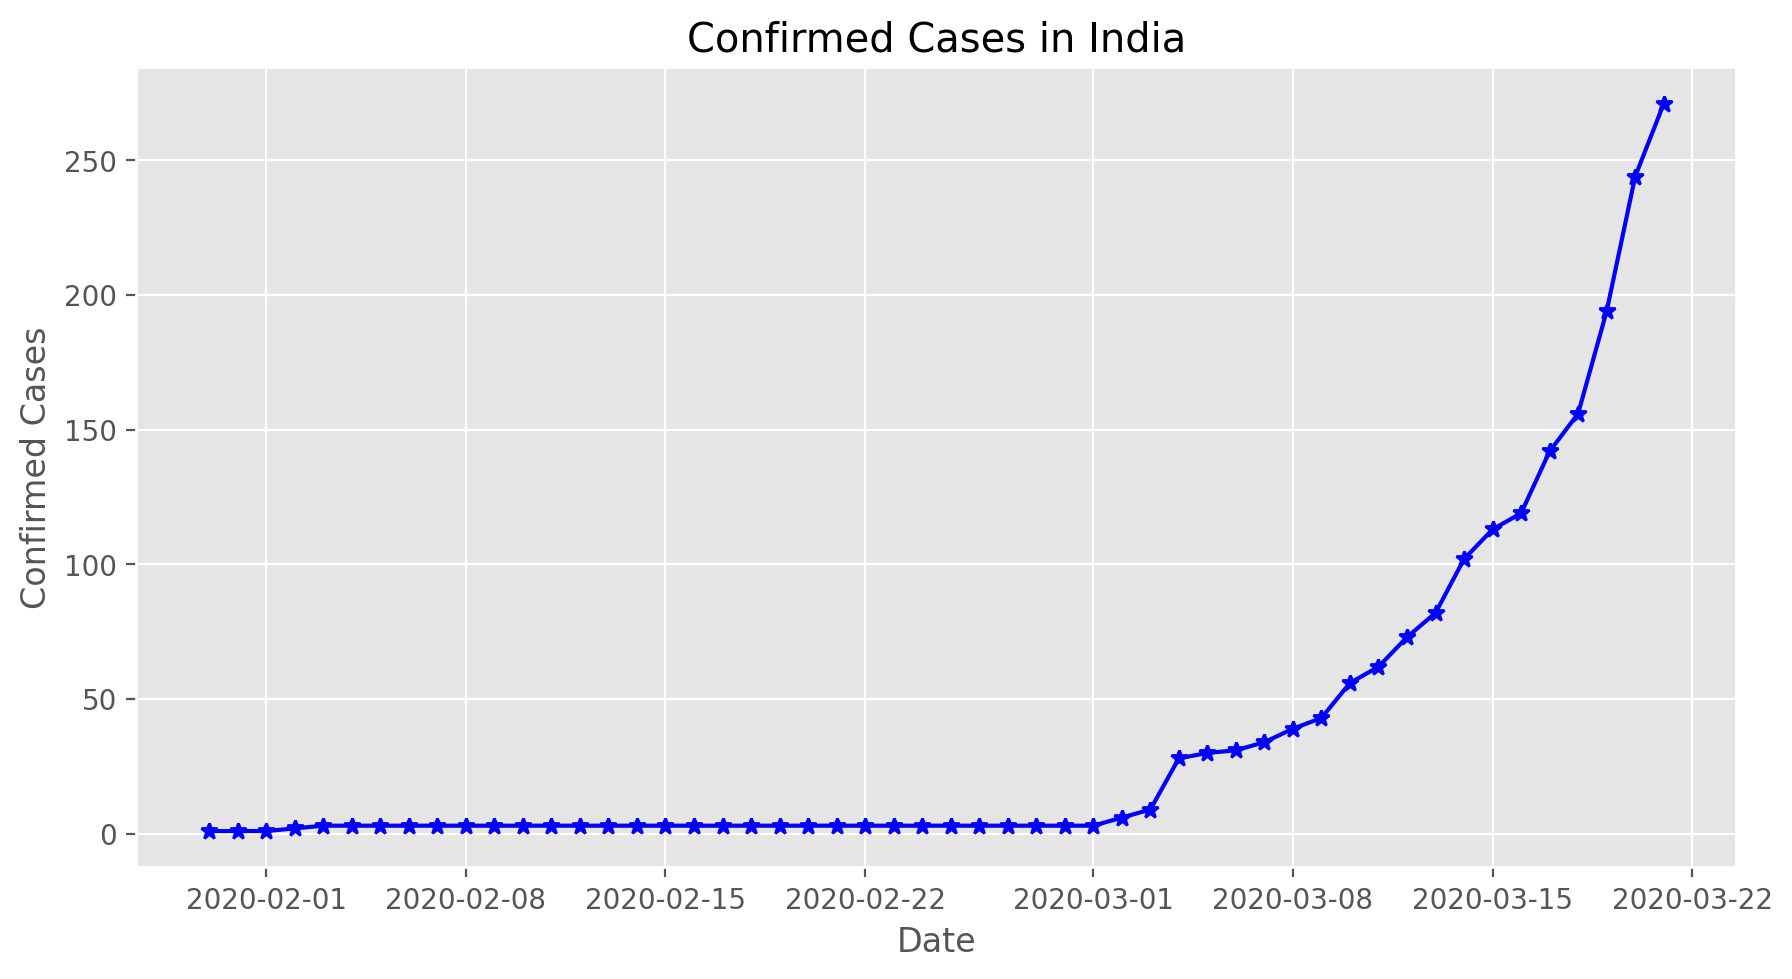

In [44]:
# matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(df_India['Date'],df_India['Total Cases'],color='b',marker='*')
axes.set_xlabel('Date')
axes.set_ylabel('Confirmed Cases')
axes.set_title('Confirmed Cases in India')
plt.show()

# plotly express :

fig = px.scatter(df_India,df_India['Date'],df_India['Total Cases'],color='Total Cases',title='Confirmed Cases in India')
fig.show()

In [47]:
# plotly :

df_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_India['Date'],y=df_India['Total Cases'],mode='lines+markers'))

## Subplots :

In [66]:
from plotly.subplots import make_subplots

In [71]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=df_Korea['Date'],y=df_Korea['Total Cases'],
                    marker=dict(color=df_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=df_Italy['Date'],y=df_Italy['Total Cases'],
                    marker=dict(color=df_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=df_India['Date'],y=df_India['Total Cases'],
                    marker=dict(color=df_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=df_Wuhan['Date'],y=df_Wuhan['Total Cases'],
                    marker=dict(color=df_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [70]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=df_Korea['Date'],y=df_Korea['Total Cases'],
                    marker=dict(color=df_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=df_Italy['Date'],y=df_Italy['Total Cases'],
                    marker=dict(color=df_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=df_India['Date'],y=df_India['Total Cases'],
                    marker=dict(color=df_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=df_Wuhan['Date'],y=df_Wuhan['Total Cases'],
                    marker=dict(color=df_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')